In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
csv_path = Path(r"C:/Users/Asus/OneDrive/Desktop/projects/personal-projects/ai-projects/digits_classifier/data/datasets/data.csv")
df = pd.read_csv(csv_path)

In [3]:
print(f"\nLoaded {len(df):,} rows from {csv_path}\n")
display(df.head())


Loaded 200 rows from C:\Users\Asus\OneDrive\Desktop\projects\personal-projects\ai-projects\digits_classifier\data\datasets\data.csv



,filename,label
0,digit_0_15_jpg.rf.5b978bfdc9c6d4be31ddfe706fc9...,0
1,digit_0_2_jpg.rf.7c53080f3f19b3ff8d1988635c83d...,0
2,digit_0_3_jpg.rf.f968821dcf666bf800caa6baef437...,0
3,digit_0_4_jpg.rf.e34462de31c01021cb7b581073feb...,0
4,digit_1_6_jpg.rf.9975dad4cfd187bb9fdfb0b081fc0...,1


In [4]:
counts   = df["label"].value_counts().sort_index()         # absolute
percent  = (counts / len(df) * 100).round(2)               # share %

dist_df = pd.DataFrame({"count": counts, "percent": percent})
print("\nFull class distribution:")
print(dist_df)


Full class distribution:
   count  percent
0     20     10.0
1     20     10.0
2     20     10.0
3     20     10.0
4     20     10.0
5     20     10.0
6     20     10.0
7     20     10.0
8     20     10.0
9     20     10.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_23004\209587818.py:15: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()
c:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


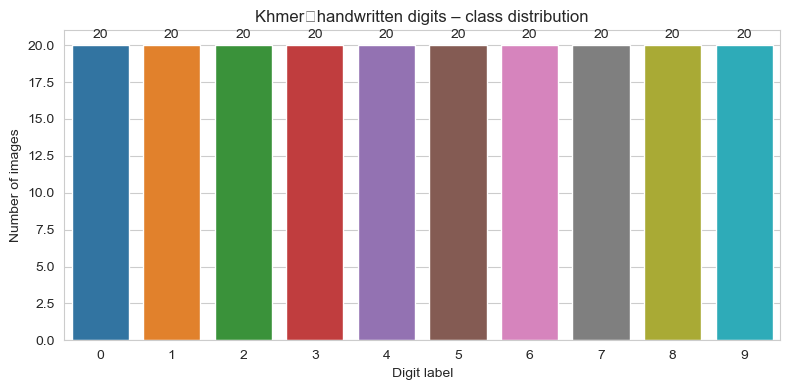

In [5]:
# ------------------------------------------------------------------
# Bar‑plot
# ------------------------------------------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=counts.index, y=counts.values)
ax.set_xlabel("Digit label")
ax.set_ylabel("Number of images")
ax.set_title("Khmer‑handwritten digits – class distribution")

# annotate bars
for x, y in zip(counts.index, counts.values):
    ax.text(x, y + 0.5, f"{y}", ha="center")

plt.tight_layout()
plt.show()

In [6]:
train_ratio = 0.80
test_ratio  = 0.20

In [7]:
df_train, df_test = train_test_split(
    df,
    test_size=test_ratio,
    stratify=df["label"],
    random_state=42,
)

processed_dir = csv_path.parent
processed_dir.mkdir(parents=True, exist_ok=True) 
print("Manifests will be saved to:", processed_dir.resolve())


Manifests will be saved to: C:\Users\Asus\OneDrive\Desktop\projects\personal-projects\ai-projects\digits_classifier\data\datasets


In [8]:
# Save CSVs
df_train.to_csv(processed_dir / "train.csv", index=False)
df_test.to_csv(processed_dir / "test.csv", index=False)

print("Finished:")
print(f"   • Train : {len(df_train)} rows")
print(f"   • Test  : {len(df_test)} rows")

Finished:
   • Train : 160 rows
   • Test  : 40 rows


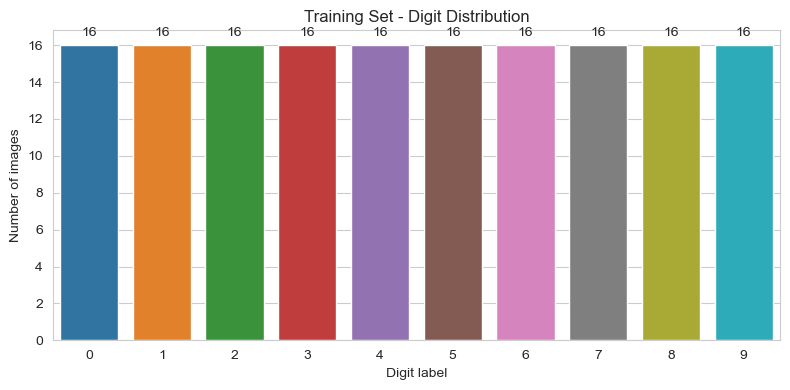

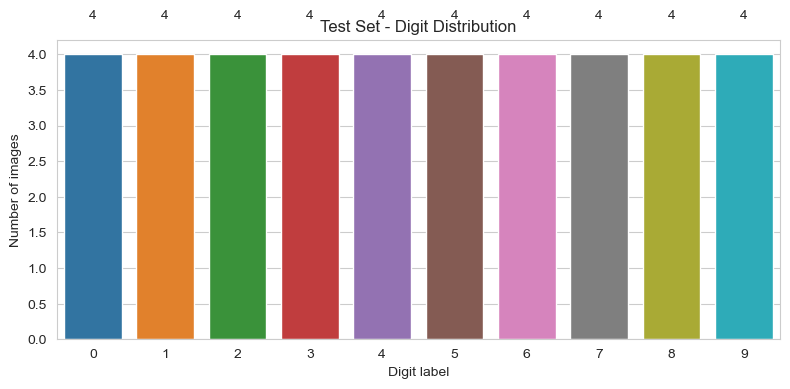

In [9]:
processed_dir = Path('../data/datasets')

# Load the datasets
df_train_viz = pd.read_csv(processed_dir / 'train.csv')
df_test_viz  = pd.read_csv(processed_dir / 'test.csv')

def plot_distribution(df, title):
    counts = df['label'].value_counts().sort_index()
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=counts.index, y=counts.values)
    ax.set_xlabel("Digit label")
    ax.set_ylabel("Number of images")
    ax.set_title(title)
    # annotate bars
    for x, y in zip(counts.index, counts.values):
        ax.text(x, y + 0.5, f"{y}", ha="center")
    plt.tight_layout()
    plt.show()

# Plot distributions
plot_distribution(df_train_viz, 'Training Set - Digit Distribution')
plot_distribution(df_test_viz,  'Test Set - Digit Distribution')

In [12]:
import cv2
import os
import pandas as pd
from glob import glob

data = pd.read_csv("../data/datasets/data.csv")

for idx, row in data.iterrows():
    print(row['filename'])

def transform(X):
    img = cv2.imread(f"../data/datasets/samples/{X['filename']}")
    print(img.shape)
    img = img.flatten()
    print(img.shape)
    print(img[:10])

ModuleNotFoundError: No module named 'cv2'